# PETALO sensor plots
Plot sensor information for individual simulated events.

In [1]:
%matplotlib inline
import os

import matplotlib        as mpl
import matplotlib.pyplot as plt
import numpy  as np
import random as rd
import tables as tb

from matplotlib.patches         import Ellipse
from matplotlib.colors import LogNorm

# Formatting options
mpl.rcParams.update({'font.size': 18})
mpl.rcParams['image.cmap'] = 'viridis'
mpl.rcParams['patch.force_edgecolor'] = False
mpl.rcParams['patch.facecolor'] = 'gray'
hargs = {'histtype': 'stepfilled', 'edgecolor': 'black', 'facecolor': 'gray'}

ANTEADIR = os.environ["ANTEADIR"]
ANTEADATADIR = ANTEADIR + "testdata"

In [2]:
# Image shape
EVT_X = 368  # number of sensors in phi-direction
EVT_Y = 278  # number of sensors in z-direction
WIN_X = 20
WIN_Y = 20

# Physical lengths
Z_MIN = -969.5
Z_MAX = 969.5
Z_MIN_WIN = 0
Z_MAX_WIN = (Z_MAX-Z_MIN)/EVT_X*WIN_X

# Read in the data

In [3]:
def read_datafiles(basedir,startfile,nfiles,full_images=False):
    """Read data files 
    """
    
    a_true_r1, a_true_phi1, a_true_z1 = [], [], [];
    a_reco_r1, a_reco_phi1, a_reco_z1 = [], [], [];
    
    a_true_r2, a_true_phi2, a_true_z2 = [], [], [];
    a_reco_r2, a_reco_phi2, a_reco_z2 = [], [], [];
    
    a_true_t1, a_true_t2 = [], [];
    
    a_sns1, a_sns2 = [], [];
    a_sns_win1, a_sns_win2 = [], [];
    
    a_event_ids = [];
    
    for ii in range(nfiles):
        
        fnum = startfile+ii
# Some code for dealing with different naming conventions.
#         if(fnum < 10):
#             fnum = "00{}".format(fnum)
#         elif(fnum < 100):
#             fnum = "0{}".format(fnum)

        fname = "{}/phantom_NEMAlike_coincidences_{}.npz".format(basedir,fnum)
        if(os.path.isfile(fname)):

            print("Adding file {}...".format(fname))

            fn = np.load(fname)
            if(full_images):
                if(len(a_sns1) > 0): a_sns1 = np.concatenate((a_sns1,fn['a_sns1']))
                else: a_sns1 = fn['a_sns1']
                if(len(a_sns2) > 0): a_sns2 = np.concatenate((a_sns2,fn['a_sns2']))
                else: a_sns2 = fn['a_sns2']
                
            if(len(a_sns_win1) > 0): a_sns_win1 = np.concatenate((a_sns_win1,fn['a_sns_win1']))
            else: a_sns_win1 = fn['a_sns_win1'] 
            if(len(a_sns_win2) > 0): a_sns_win2 = np.concatenate((a_sns_win2,fn['a_sns_win2']))
            else: a_sns_win2 = fn['a_sns_win2']
                
            if(len(a_true_r1) > 0): a_true_r1 = np.concatenate((a_true_r1,fn['a_true_r1']))
            else: a_true_r1 = fn['a_true_r1']
            if(len(a_true_r2) > 0): a_true_r2 = np.concatenate((a_true_r2,fn['a_true_r2']))
            else: a_true_r2 = fn['a_true_r2']

            if(len(a_reco_r1) > 0): a_reco_r1 = np.concatenate((a_reco_r1,fn['a_reco_r1']))
            else: a_reco_r1 = fn['a_reco_r1']
            if(len(a_reco_r2) > 0): a_reco_r2 = np.concatenate((a_reco_r2,fn['a_reco_r2']))
            else: a_reco_r2 = fn['a_reco_r2']

            if(len(a_true_z1) > 0): a_true_z1 = np.concatenate((a_true_z1,fn['a_true_z1']))
            else: a_true_z1 = fn['a_true_z1']
            if(len(a_true_z2) > 0): a_true_z2 = np.concatenate((a_true_z2,fn['a_true_z2']))
            else: a_true_z2 = fn['a_true_z2']

            if(len(a_reco_z1) > 0): a_reco_z1 = np.concatenate((a_reco_z1,fn['a_reco_z1']))
            else: a_reco_z1 = fn['a_reco_z1']
            if(len(a_reco_z2) > 0): a_reco_z2 = np.concatenate((a_reco_z2,fn['a_reco_z2']))
            else: a_reco_z2 = fn['a_reco_z2']
                
            if(len(a_true_phi1) > 0): a_true_phi1 = np.concatenate((a_true_phi1,fn['a_true_phi1']))
            else: a_true_phi1 = fn['a_true_phi1']
            if(len(a_true_phi2) > 0): a_true_phi2 = np.concatenate((a_true_phi2,fn['a_true_phi2']))
            else: a_true_phi2 = fn['a_true_phi2']

            if(len(a_reco_phi1) > 0): a_reco_phi1 = np.concatenate((a_reco_phi1,fn['a_reco_phi1']))
            else: a_reco_phi1 = fn['a_reco_phi1']
            if(len(a_reco_phi2) > 0): a_reco_phi2 = np.concatenate((a_reco_phi2,fn['a_reco_phi2']))
            else: a_reco_phi2 = fn['a_reco_phi2']

            if(len(a_true_t1) > 0): a_true_t1 = np.concatenate((a_true_t1,fn['a_true_t1']))
            else: a_true_t1 = fn['a_true_t1']
            if(len(a_true_t2) > 0): a_true_t2 = np.concatenate((a_true_t2,fn['a_true_t2']))
            else: a_true_t2 = fn['a_true_t2']
                
            if(len(a_event_ids) > 0): a_event_ids = np.concatenate((a_event_ids,fn['a_event_ids']))
            else: a_event_ids = fn['a_event_ids']
            
        else:
            
            print("Skipping file {}...".format(fname))
    
    return (a_event_ids, a_sns1, a_sns_win1, a_sns2, a_sns_win2, 
           a_true_r1, a_reco_r1, a_true_r2, a_reco_r2, 
           a_true_phi1, a_reco_phi1, a_true_phi2, a_reco_phi2,
           a_true_z1, a_reco_z1, a_true_z2, a_reco_z2, a_true_t1, a_true_t2)

In [4]:
combined_file = "{}/sensors_NEMA_1evt.npz".format(ANTEADATADIR)
if(not os.path.isfile(combined_file)):
    (a_event_ids, a_sns1, a_sns_win1, a_sns2, a_sns_win2, 
               a_true_r1, a_reco_r1, a_true_r2, a_reco_r2, 
               a_true_phi1, a_reco_phi1, a_true_phi2, a_reco_phi2,
               a_true_z1, a_reco_z1, a_true_z2, a_reco_z2, 
               a_true_t1, a_true_t2) = read_datafiles(ANTEADATADIR,0,2,full_images=True)

    # Save a combined file.
    np.savez(combined_file, a_event_ids=a_event_ids, a_sns1=a_sns1, a_sns_win1=a_sns_win1,
             a_sns2=a_sns2, a_sns_win2=a_sns_win2, a_true_r1=a_true_r1, a_reco_r1=a_reco_r1,
             a_true_r2=a_true_r2, a_reco_r2=a_reco_r2, a_true_phi1=a_true_phi1, a_reco_phi1=a_reco_phi1,
             a_true_phi2=a_true_phi2, a_reco_phi2=a_reco_phi2, a_true_z1=a_true_z1, a_reco_z1=a_reco_z1,
             a_true_z2=a_true_z2, a_reco_z2=a_reco_z2, a_true_t1=a_true_t1, a_true_t2=a_true_t2)
else:
    fn = np.load(combined_file)
    (a_event_ids, a_sns1, a_sns_win1, a_sns2, a_sns_win2, 
               a_true_r1, a_reco_r1, a_true_r2, a_reco_r2, 
               a_true_phi1, a_reco_phi1, a_true_phi2, a_reco_phi2,
               a_true_z1, a_reco_z1, a_true_z2, a_reco_z2,
               a_true_t1, a_true_t2) = (fn['a_event_ids'], fn['a_sns1'], fn['a_sns_win1'],
                                        fn['a_sns2'], fn['a_sns_win2'],
                                        fn['a_true_r1'], fn['a_reco_r1'], fn['a_true_r2'], fn['a_reco_r2'],
                                        fn['a_true_phi1'], fn['a_reco_phi1'], fn['a_true_phi2'], fn['a_reco_phi2'],
                                        fn['a_true_z1'], fn['a_reco_z1'], fn['a_true_z2'], fn['a_reco_z2'],
                                        fn['a_true_t1'], fn['a_true_t2'])

Save a file with a subset of the events if necessary.

reduced_file = "{}/sensors_NEMA_1evt.npz".format(ANTEADATADIR)
nevts = 2
np.savez(reduced_file, a_event_ids=a_event_ids[0:nevts], a_sns1=a_sns1[0:nevts], a_sns_win1=a_sns_win1[0:nevts],
         a_sns2=a_sns2[0:nevts], a_sns_win2=a_sns_win2[0:nevts], a_true_r1=a_true_r1[0:nevts], a_reco_r1=a_reco_r1[0:nevts],
         a_true_r2=a_true_r2[0:nevts], a_reco_r2=a_reco_r2[0:nevts], a_true_phi1=a_true_phi1[0:nevts], a_reco_phi1=a_reco_phi1[0:nevts],
         a_true_phi2=a_true_phi2[0:nevts], a_reco_phi2=a_reco_phi2[0:nevts], a_true_z1=a_true_z1[0:nevts], a_reco_z1=a_reco_z1[0:nevts],
         a_true_z2=a_true_z2[0:nevts], a_reco_z2=a_reco_z2[0:nevts], a_true_t1=a_true_t1[0:nevts], a_true_t2=a_true_t2[0:nevts])

## Plotting functions

In [5]:
def plot_full_event(evtnum, sns1, sns_win1, r1_true, phi1_true, z1_true, r1_reco, phi1_reco, z1_reco, 
                            sns2, sns_win2, r2_true, phi2_true, z2_true, r2_reco, phi2_reco, z2_reco,
                            title_str="", show_true=True, show_info=True):
    
    # Prepare all histograms to be plotted.
    hh = sns1.reshape(EVT_X, EVT_Y) + sns2.reshape(EVT_X, EVT_Y)
    hh1_zoom = sns_win1.reshape(WIN_X,WIN_Y)
    hh2_zoom = sns_win2.reshape(WIN_X,WIN_Y)
    
    # Compute the charge fractions.
    qf1 = np.sum(sns_win1)/np.sum(sns1)
    qf2 = np.sum(sns_win2)/np.sum(sns2)
    
    fig = plt.figure()
    fig.set_figheight(7.0)
    fig.set_figwidth(28.0)
    
    ax1 = fig.add_subplot(131)
    plt.imshow(hh, extent=[Z_MIN, Z_MAX, -np.pi, np.pi], aspect=(Z_MAX-Z_MIN)/(2*np.pi), interpolation="none", norm=LogNorm())
    c1 = plt.colorbar()
    c1.set_label("SiPM charge")
    if(show_true):
        plt.scatter(z1_true,-phi1_true,marker='x',color='red',s=2,linewidth=3)
        plt.scatter(z2_true,-phi2_true,marker='x',color='red',s=2,linewidth=3)
    if(show_info): plt.title("Event {}\n true (r$_1$, $\phi_1$, z$_1$) = ({:.2f}, {:.2f}, {:.2f})\n true (r$_2$, $\phi_2$, z$_2$) = ({:.2f}, {:.2f}, {:.2f})".format(evtnum,r1_true,phi1_true,z1_true,r2_true,phi2_true,z2_true))
    plt.xlabel("z (mm)")
    plt.ylabel("$\phi$ (rad)")
    
    ax2 = fig.add_subplot(132)
    plt.imshow(hh1_zoom, extent=[Z_MIN_WIN, Z_MAX_WIN, 0, np.pi/WIN_Y], aspect=(Z_MAX_WIN-Z_MIN_WIN)*WIN_X/(np.pi), interpolation="none")#, norm=LogNorm())
    #if(show_info): plt.title("Gamma 1 window: {:.2f}Q$_1$\n errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(qf1,r1_true-r1_reco,phi1_true-phi1_reco,z1_true-z1_reco))
    if(show_info): plt.title("errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(r1_true-r1_reco,phi1_true-phi1_reco,z1_true-z1_reco))
    c2 = plt.colorbar()
    c2.set_label("SiPM charge")
    plt.xlabel("relative z (mm)")
    plt.ylabel("relative $\phi$ (rad)")
    
    ax3 = fig.add_subplot(133)
    plt.imshow(hh2_zoom, extent=[Z_MIN_WIN, Z_MAX_WIN, 0, np.pi/WIN_Y], aspect=(Z_MAX_WIN-Z_MIN_WIN)*WIN_X/(np.pi), interpolation="none")#, norm=LogNorm())
    #plt.gca().axes.get_yaxis().set_visible(False)
    #if(show_info): plt.title("Gamma 2: {:.2f}Q$_2$\n errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(qf2,r2_true-r2_reco,phi2_true-phi2_reco,z2_true-z2_reco))
    if(show_info): plt.title("errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(r2_true-r2_reco,phi2_true-phi2_reco,z2_true-z2_reco))
    c3 = plt.colorbar()
    c3.set_label("SiPM charge")
    plt.xlabel("relative z (mm)")
    plt.ylabel("relative $\phi$ (rad)")

def plot_win_event(evtnum, sns_win1, r1_true, phi1_true, z1_true, r1_reco, phi1_reco, z1_reco, 
                           sns_win2, r2_true, phi2_true, z2_true, r2_reco, phi2_reco, z2_reco,
                            title_str="", show_true=True, show_info=True):
    
    # Prepare all histograms to be plotted.
    #hh = sns1.reshape(EVT_X, EVT_Y) + sns2.reshape(EVT_X, EVT_Y)
    hh1_zoom = sns_win1.reshape(WIN_X,WIN_Y)
    hh2_zoom = sns_win2.reshape(WIN_X,WIN_Y)
    
    # Compute the charge fractions.
    #qf1 = np.sum(sns_win1)/np.sum(sns1)
    #qf2 = np.sum(sns_win2)/np.sum(sns2)
    
    fig = plt.figure()
    fig.set_figheight(7.0)
    fig.set_figwidth(18.0)
    
    ax1 = fig.add_subplot(121)
    plt.imshow(hh1_zoom, extent=[Z_MIN_WIN, Z_MAX_WIN, 0, np.pi/WIN_Y], aspect=(Z_MAX_WIN-Z_MIN_WIN)*WIN_X/(np.pi), interpolation="none", norm=LogNorm())
    #if(show_info): plt.title("Gamma 1 window: {:.2f}Q$_1$\n errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(qf1,r1_true-r1_reco,phi1_true-phi1_reco,z1_true-z1_reco))
    if(show_info): plt.title("errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(r1_true-r1_reco,phi1_true-phi1_reco,z1_true-z1_reco))
    plt.colorbar()
    plt.xlabel("relative z (mm)")
    plt.ylabel("relative $\phi$ (rad)")
    
    ax3 = fig.add_subplot(133)
    plt.imshow(hh2_zoom, extent=[Z_MIN_WIN, Z_MAX_WIN, 0, np.pi/WIN_Y], aspect=(Z_MAX_WIN-Z_MIN_WIN)*WIN_X/(np.pi), interpolation="none", norm=LogNorm())
    #plt.gca().axes.get_yaxis().set_visible(False)
    #if(show_info): plt.title("Gamma 2: {:.2f}Q$_2$\n errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(qf2,r2_true-r2_reco,phi2_true-phi2_reco,z2_true-z2_reco))
    if(show_info): plt.title("errors (r, $\phi$, z) = ({:.2f}, {:.2f}, {:.2f})".format(r2_true-r2_reco,phi2_true-phi2_reco,z2_true-z2_reco))
    plt.colorbar()
    plt.xlabel("relative z (mm)")
    plt.ylabel("relative $\phi$ (rad)")

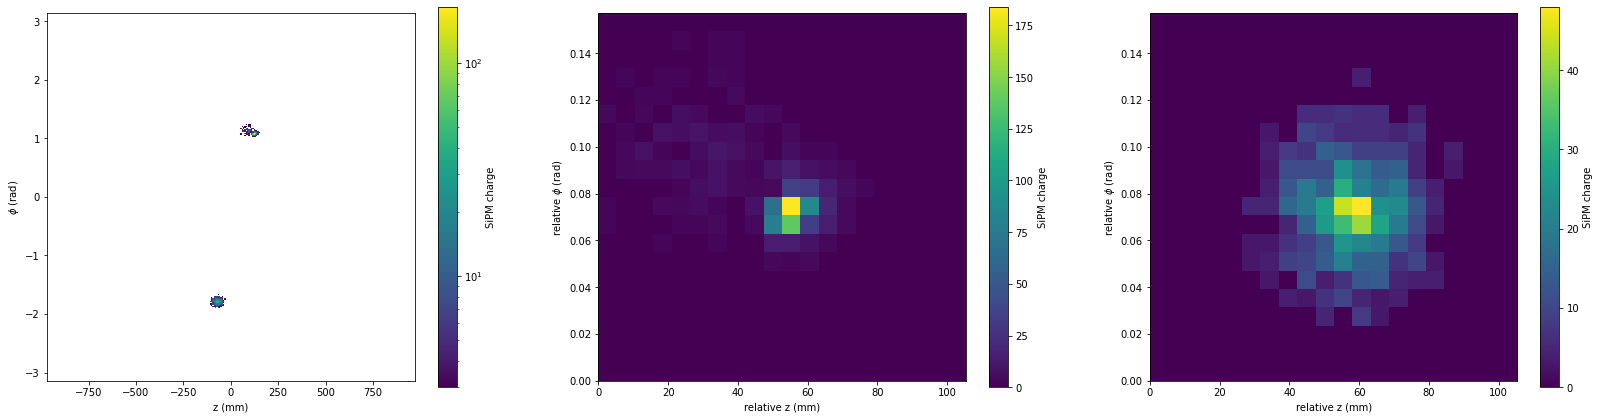

In [6]:
# Plot full events.
ievt = 0 # can select based on event number: np.where(a_event_ids == 111)[0][0]
plot_full_event(a_event_ids[ievt], a_sns1[ievt], a_sns_win1[ievt], 
               a_true_r1[ievt], a_true_phi1[ievt], a_true_z1[ievt],
               a_reco_r1[ievt], a_reco_phi1[ievt], a_reco_z1[ievt],
               a_sns2[ievt], a_sns_win2[ievt],
               a_true_r2[ievt], a_true_phi2[ievt], a_true_z2[ievt],
               a_reco_r2[ievt], a_reco_phi2[ievt], a_reco_z2[ievt], show_true=False, show_info=False)